In [1]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib

import scipy

import pystan

import random

import pandas as pd

import itertools



#input data

y = [607, 583, 521, 494, 369, 782, 570, 678, 467, 620, 425, 395, 346, 361, 310, 300, 382, 294, 315, 323, 421, 339, 398, 328, 335, 291, 329, 310, 294, 321, 286, 349, 279, 268, 293, 310, 259, 241, 243, 272, 247, 275, 220, 245, 268, 357, 273, 301, 322, 276, 401, 368, 149, 507, 411, 362, 358, 355, 362, 324, 332, 268, 259, 274, 248, 254, 242, 286, 276, 237, 259, 251, 239, 247, 260, 237, 206, 242, 361, 267, 245, 331, 357, 284, 263, 244, 317, 225, 254, 253, 251, 314, 239, 248, 250, 200, 256, 233, 427, 391, 331, 395, 337, 392, 352, 381, 330, 368, 381, 316, 335, 316, 302, 375, 361, 330, 351, 186, 221, 278, 244, 218, 126, 269, 238, 194, 384, 154, 555, 387, 317, 365, 357, 390, 320, 316, 297, 354, 266, 279, 327, 285, 258, 267, 226, 237, 264, 510, 490, 458, 425, 522, 927, 555, 550, 516, 548, 560, 545, 633, 496, 498, 223, 222, 309, 244, 207, 258, 255, 281, 258, 226, 257, 263, 266, 238, 249, 340, 247, 216, 241, 239, 226, 273, 235, 251, 290, 473, 416, 451, 475, 406, 349, 401, 334, 446, 401, 252, 266, 210, 228, 250, 265, 236, 289, 244, 327, 274, 223, 327, 307, 338, 345, 381, 369, 445, 296, 303, 326, 321, 309, 307, 319, 288, 299, 284, 278, 310, 282, 275, 372, 295, 306, 303, 285, 316, 294, 284, 324, 264, 278, 369, 254, 306, 237, 439, 287, 285, 261, 299, 311, 265, 292, 282, 271, 268, 270, 259, 269, 249, 261, 425, 291, 291, 441, 222, 347, 244, 232, 272, 264, 190, 219, 317, 232, 256, 185, 210, 213, 202, 226, 250, 238, 252, 233, 221, 220, 287, 267, 264, 273, 304, 294, 236, 200, 219, 276, 287, 365, 438, 420, 396, 359, 405, 397, 383, 360, 387, 429, 358, 459, 371, 368, 452, 358, 371]

#index of each data

ind = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34]

#indicator if the individual is a child or not, 1-child, 0-adult

child_j = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

child_i = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#attempt number of each observation

x = [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]




I=len(y)
J=max(ind)

## Stan implementation

ass7_code = """

data {

    int<lower=0> J; //Number of participants

    int<lower=0> I; // number of samples 

    real y[I]; // Vector of samples, y with length "Samples" of real values

    int ind[I];

    real child_j[J];

    real x[I];

}

parameters {

    real mu0;

    real mu1;

    real<lower=0> tau0;

    real<lower=0> tau1;

    real<lower=0> sigma;

    real phi0; //predictor parameter

    real phi1; //predictor parameter

    real eta0[J]; //reparametrization parameter

    real eta1[J]; //reparametrization parameter

}

transformed parameters { //Reparametrization

    real theta0[J];          // intercept for each individual

    real theta1[J];          // slope for each individual

    for (i in 1:J) {

        theta0[i] =mu0+phi0*child_j[i]+tau0*eta0[i];

        theta1[i] =mu1+phi1*child_j[i]+tau1*eta1[i];

    }

}

model {

    mu0 ~ uniform(-10000, 10000); // Flat prior distribution on mu0

    mu1 ~ uniform(-10000, 10000); // Flat prior distribution on mu1

    tau0 ~ uniform(0, 10000); // Flat prior distribution on tau0

    tau1 ~ uniform(0, 10000); // Flat prior distribution on tau1

    phi0 ~ uniform(-10000, 10000); // Flat prior distribution on phi0

    phi1 ~ uniform(-10000, 10000); // Flat prior distribution on phi1

    for (j in 1:J) {

        eta0[j] ~ normal(0,1); 

        eta1[j] ~ normal(0,1);

    }

    sigma ~ uniform(0, 10000); // Flat prior distribution on sigma

    for (k in 1:I)

        y[k] ~ lognormal(theta0[ind[k]] + theta1[ind[k]]*x[k], sigma); 
}

"""





ass7_dat = {'I': I, #Individual index, +1 is correcting the indexing to start from 1 for the C++ compilation

            'J': J, #Total number of individuals

            'child_j': child_j, #Indexing, 1 if child, 0 if not

            'ind': ind, #Total number of samples

            'x': x, 

            'y': y }



modelb = pystan.StanModel(model_code=ass7_code) #Create a model instance

fitb = modelb.sampling(data=ass7_dat,iter=100000,warmup=1000, chains=1, control={'adapt_delta':0.85}) #Call the sampling using the model 


#print(fitb)






INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_80268ac3b6e6d9cc1e50ae460c155463 NOW.


In [0]:
#Extracting the data
parmExtract=fitb.extract();

mu0=parmExtract['mu0']
mu1=parmExtract['mu1'] #this gives the mu of log y
sigma=parmExtract['sigma']
theta0=parmExtract['theta0']
theta1=parmExtract['theta1']
tau0=parmExtract['tau0']
tau1=parmExtract['tau1']
phi0=parmExtract['phi0']
phi1=parmExtract['phi1']
logPosterior=parmExtract['lp__']


In [0]:
#HDI function
import pandas
    
def HDIofMCMC(SampleArray, credMass=.95): #Computes the HDI from an array of a unimodal samples of representative values.
    sortedarray=np.sort(SampleArray)
    CielingIndex=np.ceil(credMass*np.size(sortedarray))
    nCI=np.size(sortedarray)-CielingIndex
    ciWidth=np.zeros(int(nCI))
    for i in range(int(nCI)):
        ciWidth[i]=sortedarray[i+int(CielingIndex)]-sortedarray[i]
    HDImin=(sortedarray[np.argmin(ciWidth)])
    HDImax=(sortedarray[np.argmin(ciWidth)+int(CielingIndex)])
    HDIlim=np.array([HDImin,HDImax])
    return(HDIlim)
    

Text(0.5, 0, 'exp\u2061(θ1[4])')

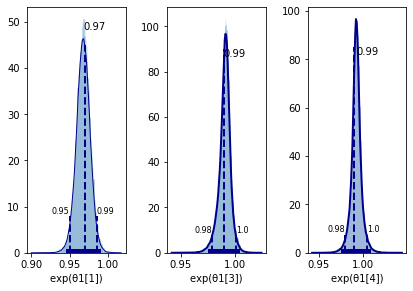

In [11]:
import seaborn as sns
import statistics as st

Theta1_1_Real=np.exp(theta1[:,0]) # slope for participant 1
Theta1_3_Real=np.exp(theta1[:,2]) #slope for participant 3
Theta1_4_Real=np.exp(theta1[:,3]) #slope for participant 4

fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout()

#plot for participant 1
plt.subplot(131)
sns.distplot(Theta1_1_Real, hist=True, kde=True, 
             bins=1000, color = 'darkblue', 
             hist_kws={'edgecolor':'lightblue'},
             kde_kws={'linewidth': 1})

HDI=HDIofMCMC(Theta1_1_Real,.95)
plt.plot(HDI,(0,0),'darkblue',linewidth=8.0)
ys = np.linspace(1, 3, 5)
plt.vlines(x=np.round(HDI[0],30), ymin=0, ymax=8, colors='darkblue', linestyles='--', lw=2)
plt.vlines(x=np.round(st.mean(Theta1_1_Real),2), ymin=0, ymax=45, colors='darkblue', linestyles='--', lw=2)
plt.vlines(x=np.round(HDI[1],30), ymin=0, ymax=8, colors='darkblue', linestyles='--', lw=2)
#plt.text(np.mean(HDI), 2, r'$95\%$ HDI', fontsize=10,ha='center')
plt.text(HDI[0], 8, str(np.round(HDI[0],2)), fontsize=8,ha='right',va='bottom')
plt.text(HDI[1], 8, str(np.round(HDI[1],2)), fontsize=8,ha='left',va='bottom')
plt.text(st.mean(HDI),50,str(np.round(st.mean(HDI),2)),va='top')
plt.xlabel('exp⁡(θ1[1])')


plt.subplot(132)
sns.distplot(Theta1_3_Real, hist=True, kde=True, 
             bins=1000, color = 'darkblue', 
             hist_kws={'edgecolor':'lightblue'},
             kde_kws={'linewidth': 2})

HDI=HDIofMCMC(Theta1_3_Real,.95)
plt.plot(HDI,(0,0),'darkblue',linewidth=8.0)
ys = np.linspace(1, 3, 5)
plt.vlines(x=np.round(HDI[0],30), ymin=0, ymax=8, colors='darkblue', linestyles='--', lw=2)
plt.vlines(x=np.round(st.mean(Theta1_3_Real),2), ymin=0, ymax=90, colors='darkblue', linestyles='--', lw=2)
plt.vlines(x=np.round(HDI[1],30), ymin=0, ymax=8, colors='darkblue', linestyles='--', lw=2)
#plt.text(np.mean(HDI), 2, r'$95\%$ HDI', fontsize=10,ha='center')
plt.text(HDI[0], 8, str(np.round(HDI[0],2)), fontsize=8,ha='right',va='bottom')
plt.text(HDI[1], 8, str(np.round(HDI[1],2)), fontsize=8,ha='left',va='bottom')
plt.text(st.mean(HDI),90,str(np.round(st.mean(HDI),2)),va='top')
plt.xlabel('exp⁡(θ1[3])')


plt.subplot(133)
sns.distplot(Theta1_4_Real, hist=True, kde=True, 
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'lightblue'},
             kde_kws={'linewidth': 2})

HDI=HDIofMCMC(Theta1_4_Real,.95)
plt.plot(HDI,(0,0),'darkblue',linewidth=8.0)
ys = np.linspace(1, 3, 5)
plt.vlines(x=np.round(HDI[0],30), ymin=0, ymax=8, colors='darkblue', linestyles='--', lw=2)
plt.vlines(x=np.round(st.mean(Theta1_4_Real),2), ymin=0, ymax=85, colors='darkblue', linestyles='--', lw=2)
plt.vlines(x=np.round(HDI[1],30), ymin=0, ymax=8, colors='darkblue', linestyles='--', lw=2)
#plt.text(np.mean(HDI), 2, r'$95\%$ HDI', fontsize=10,ha='center')
plt.text(HDI[0], 8, str(np.round(HDI[0],2)), fontsize=8,ha='right',va='bottom')
plt.text(HDI[1], 8, str(np.round(HDI[1],2)), fontsize=8,ha='left',va='bottom')
plt.text(st.mean(HDI),85,str(np.round(st.mean(HDI),2)),va='top')
plt.xlabel('exp⁡(θ1[4])')

In [7]:
No1Response1= np.exp(theta0[:,0] + theta1[:,0]*1+sigma**2/2)
HDI1Response1 = HDIofMCMC(No1Response1,.95)     
Mean1Response1 = np.mean(HDI1Response1)
print('Response 1 for number1:',Mean1Response1)

No1Response5= np.exp(theta0[:,0] + theta1[:,0]*5+sigma**2/2)
HDI1Response5 = HDIofMCMC(No1Response5,.95)     
Mean1Response5 = np.mean(HDI1Response5)
print('Response 5 for number1:',Mean1Response5)

No3Response1= np.exp(theta0[:,2] + theta1[:,2]*1+sigma**2/2)
HDI3Response1 = HDIofMCMC(No3Response1,.95)     
Mean3Response1 = np.mean(HDI3Response1)
print('Response 1 for number3:',Mean3Response1)

No3Response5= np.exp(theta0[:,2] + theta1[:,2]*5+sigma**2/2)
HDI3Response5 = HDIofMCMC(No3Response5,.95)     
Mean3Response5 = np.mean(HDI3Response5)
print('Response 5 for numbe31:',Mean3Response5)

No4Response1= np.exp(theta0[:,3] + theta1[:,3]*1+sigma**2/2)
HDI4Response1 = HDIofMCMC(No4Response1,.95)     
Mean4Response1 = np.mean(HDI4Response1)
print('Response 1 for number4:',Mean4Response1)

No4Response5= np.exp(theta0[:,3] + theta1[:,3]*5+sigma**2/2)
HDI4Response5 = HDIofMCMC(No4Response5,.95)     
Mean4Response5 = np.mean(HDI4Response5)
print('Response 5 for number4:',Mean4Response5)



Response 1 for number1: 542.2827159878491
Response 5 for number1: 475.90769728066846
Response 1 for number3: 358.61607888004335
Response 5 for numbe31: 346.53982717658687
Response 1 for number4: 322.73319797884596
Response 5 for number4: 312.338314369411


Text(0.5, 0, 'exp\u2061(θ0[4]+θ1[4]x+σ^2/2])')

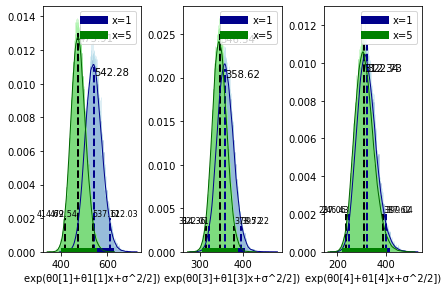

In [8]:
import statistics as st
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout()

#plot for participant 1
plt.subplot(131)
sns.distplot(No1Response1, hist=True, kde=True, 
             bins=1000, color = 'darkblue', 
             hist_kws={'edgecolor':'lightblue'},
             kde_kws={'linewidth': 1}, label='x=1')

HDI=HDIofMCMC(No1Response1,.95)
plt.plot(HDI,(0,0),'darkblue',linewidth=8.0)
ys = np.linspace(1, 3, 5)
plt.vlines(x=np.round(HDI[0],3), ymin=0, ymax=0.002, colors='darkblue', linestyles='--', lw=2)
plt.vlines(x=np.round(st.mean(No1Response1),2), ymin=0, ymax=0.011, colors='darkblue', linestyles='--', lw=2)
plt.vlines(x=np.round(HDI[1],3), ymin=0, ymax=0.002, colors='darkblue', linestyles='--', lw=2)
#plt.text(np.mean(HDI), 2, r'$95\%$ HDI', fontsize=10,ha='center')
plt.text(HDI[0], 0.002, str(np.round(HDI[0],2)), fontsize=8,ha='right',va='bottom')
plt.text(HDI[1], 0.002, str(np.round(HDI[1],2)), fontsize=8,ha='left',va='bottom')
plt.text(st.mean(HDI),0.011,str(np.round(st.mean(HDI),2)),va='top')

sns.distplot(No1Response5, hist=True, kde=True, 
             bins=1000, color = 'darkgreen', 
             hist_kws={'edgecolor':'lightgreen'},
             kde_kws={'linewidth': 1},label='x=2')

HDI=HDIofMCMC(No1Response5,.95)
plt.plot(HDI,(0,0),'g',linewidth=8.0)
ys = np.linspace(1, 3, 5)
plt.vlines(x=np.round(HDI[0],3), ymin=0, ymax=0.002, colors='k', linestyles='--', lw=2)
plt.vlines(x=np.round(st.mean(No1Response5),2), ymin=0, ymax=0.013, colors='k', linestyles='--', lw=2)
plt.vlines(x=np.round(HDI[1],3), ymin=0, ymax=0.002, colors='k', linestyles='--', lw=2)
#plt.text(np.mean(HDI), 2, r'$95\%$ HDI', fontsize=10,ha='center')
plt.text(HDI[0], 0.002, str(np.round(HDI[0],2)), fontsize=8,ha='right',va='bottom')
plt.text(HDI[1], 0.002, str(np.round(HDI[1],2)), fontsize=8,ha='left',va='bottom')
plt.text(st.mean(HDI),0.013,str(np.round(st.mean(HDI),2)),va='top')
plt.legend(labels=['x=1', 'x=5'])
plt.xlabel('exp⁡(θ0[1]+θ1[1]x+σ^2/2])')

#plot for participant 3
plt.subplot(132)
sns.distplot(No3Response1, hist=True, kde=True, 
             bins=1000, color = 'darkblue', 
             hist_kws={'edgecolor':'lightblue'},
             kde_kws={'linewidth': 1})

HDI=HDIofMCMC(No3Response1,.95)
plt.plot(HDI,(0,0),'darkblue',linewidth=8.0)
ys = np.linspace(1, 3, 5)
plt.vlines(x=np.round(HDI[0],3), ymin=0, ymax=0.003, colors='darkblue', linestyles='--', lw=2)
plt.vlines(x=np.round(st.mean(No3Response1),2), ymin=0, ymax=0.021, colors='darkblue', linestyles='--', lw=2)
plt.vlines(x=np.round(HDI[1],3), ymin=0, ymax=0.003, colors='darkblue', linestyles='--', lw=2)
#plt.text(np.mean(HDI), 2, r'$95\%$ HDI', fontsize=10,ha='center')
plt.text(HDI[0], 0.003, str(np.round(HDI[0],2)), fontsize=8,ha='right',va='bottom')
plt.text(HDI[1], 0.003, str(np.round(HDI[1],2)), fontsize=8,ha='left',va='bottom')
plt.text(st.mean(HDI),0.021,str(np.round(st.mean(HDI),2)),va='top')

sns.distplot(No3Response5, hist=True, kde=True, 
             bins=1000, color = 'darkgreen', 
             hist_kws={'edgecolor':'lightgreen'},
             kde_kws={'linewidth': 1})

HDI=HDIofMCMC(No3Response5,.95)
plt.plot(HDI,(0,0),'g',linewidth=8.0)
ys = np.linspace(1, 3, 5)
plt.vlines(x=np.round(HDI[0],3), ymin=0, ymax=0.003, colors='k', linestyles='--', lw=2)
plt.vlines(x=np.round(st.mean(No3Response5),2), ymin=0, ymax=0.025, colors='k', linestyles='--', lw=2)
plt.vlines(x=np.round(HDI[1],3), ymin=0, ymax=0.003, colors='k', linestyles='--', lw=2)
#plt.text(np.mean(HDI), 2, r'$95\%$ HDI', fontsize=10,ha='center')
plt.text(HDI[0], 0.003, str(np.round(HDI[0],2)), fontsize=8,ha='right',va='bottom')
plt.text(HDI[1], 0.003, str(np.round(HDI[1],2)), fontsize=8,ha='left',va='bottom')
plt.text(st.mean(HDI),0.025,str(np.round(st.mean(HDI),2)),va='top')
plt.legend(labels=['x=1', 'x=5'])
plt.xlabel('exp⁡(θ0[3]+θ1[3]x+σ^2/2])')

#plot for participant 4
plt.subplot(133)
sns.distplot(No4Response1, hist=True, kde=True, 
             bins=1000, color = 'darkblue', 
             hist_kws={'edgecolor':'lightblue'},
             kde_kws={'linewidth': 1})

HDI=HDIofMCMC(No4Response1,.95)
plt.plot(HDI,(0,0),'darkblue',linewidth=8.0)
ys = np.linspace(1, 3, 5)
plt.vlines(x=np.round(HDI[0],3), ymin=0, ymax=0.002, colors='darkblue', linestyles='--', lw=2)
plt.vlines(x=np.round(st.mean(No4Response1),2), ymin=0, ymax=0.011, colors='darkblue', linestyles='--', lw=2)
plt.vlines(x=np.round(HDI[1],3), ymin=0, ymax=0.002, colors='darkblue', linestyles='--', lw=2)
#plt.text(np.mean(HDI), 2, r'$95\%$ HDI', fontsize=10,ha='center')
plt.text(HDI[0], 0.002, str(np.round(HDI[0],2)), fontsize=8,ha='right',va='bottom')
plt.text(HDI[1], 0.002, str(np.round(HDI[1],2)), fontsize=8,ha='left',va='bottom')
plt.text(st.mean(HDI),0.010,str(np.round(st.mean(HDI),2)),va='top')

sns.distplot(No4Response5, hist=True, kde=True, 
             bins=1000, color = 'darkgreen', 
             hist_kws={'edgecolor':'lightgreen'},
             kde_kws={'linewidth': 1})

HDI=HDIofMCMC(No4Response5,.95)
plt.plot(HDI,(0,0),'g',linewidth=8.0)
ys = np.linspace(1, 3, 5)
plt.vlines(x=np.round(HDI[0],3), ymin=0, ymax=0.002, colors='k', linestyles='--', lw=2)
plt.vlines(x=np.round(st.mean(No4Response5),2), ymin=0, ymax=0.011, colors='k', linestyles='--', lw=2)
plt.vlines(x=np.round(HDI[1],3), ymin=0, ymax=0.002, colors='k', linestyles='--', lw=2)
#plt.text(np.mean(HDI), 2, r'$95\%$ HDI', fontsize=10,ha='center')
plt.text(HDI[0], 0.002, str(np.round(HDI[0],2)), fontsize=8,ha='right',va='bottom')
plt.text(HDI[1], 0.002, str(np.round(HDI[1],2)), fontsize=8,ha='left',va='bottom')
plt.text(st.mean(HDI),0.010,str(np.round(st.mean(HDI),2)),va='top')
plt.legend(labels=['x=1', 'x=5'])
plt.xlabel('exp⁡(θ0[4]+θ1[4]x+σ^2/2])')

Text(0.5, 1.0, 'Oliver')

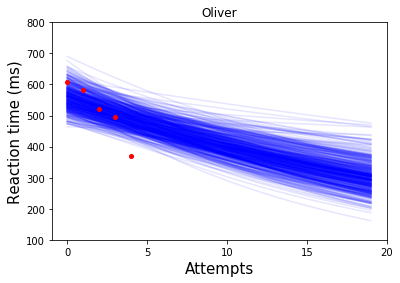

In [49]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 24 14:35:17 2020

@author: jaykum
"""
import numpy as np

import matplotlib.pyplot as plt

import matplotlib
import scipy

import pystan

import random

import pandas as pd

import itertools



#regression lines for Oliver
nlines = 500
nattempts = 20

for i in range(nlines): #plot 500 credible regression lines

    Index=random.randint(1,np.size(sigma))
    
    ylist =[]
    for attempt in range(0,nattempts):
        y_credible=np.exp(theta0[Index,0] + theta1[Index,0] * attempt + sigma[Index]**2/2)
        ylist.append(y_credible)

    plt.plot(range(0,nattempts),ylist,'-b',alpha=.1)

## Data plot
arr= np.array(ind)
ii = np.where(arr == 1)
yplot = np.zeros(len(ii[0]))
for i in range (len(ii[0])):
  yplot[i] = y[ii[0][i]] 
plt.plot(yplot, color = "red", linestyle = "none", markersize = 4, marker = "o", label = "data")

plt.xlabel(r'Attempts',fontsize=15)
plt.ylabel('Reaction time (ms)',fontsize=15)
plt.xticks([0,5,10,15,20])
plt.ylim(100, 800) #To keep the scale constant between figures
plt.title('Oliver')






Text(0.5, 1.0, 'Jesper')

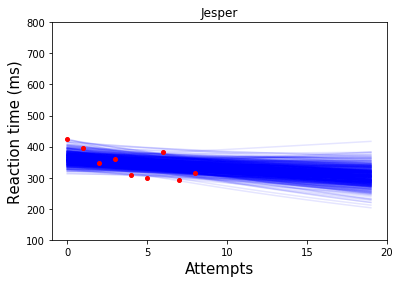

In [47]:
#regression lines for Jesper
nlines = 500
nattempts = 20

for i in range(nlines): #plot 500 credible regression lines

    Index=random.randint(1,np.size(sigma))
    
    ylist =[]
    for attempt in range(0,nattempts):
        y_credible=np.exp(theta0[Index,2] + theta1[Index,2] * attempt + sigma[Index]**2/2)
        ylist.append(y_credible)

    plt.plot(range(0,nattempts),ylist,'-b',alpha=.1)

## Data plot
arr= np.array(ind)
ii = np.where(arr == 3)
yplot = np.zeros(len(ii[0]))
for i in range (len(ii[0])):
  yplot[i] = y[ii[0][i]] 
plt.plot(yplot, color = "red", linestyle = "none", markersize = 4, marker = "o", label = "data")

plt.xlabel(r'Attempts',fontsize=15)
plt.ylabel('Reaction time (ms)',fontsize=15)
plt.xticks([0,5,10,15,20])
plt.ylim(100, 800) #To keep the scale constant between figures
plt.title('Jesper')



Text(0.5, 1.0, 'The Dude')

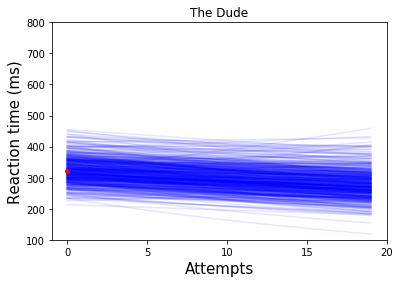

In [48]:
#regression lines for The Dude
nlines = 500
nattempts = 20

for i in range(nlines): #plot 150 credible regression lines

    Index=random.randint(1,np.size(sigma))
    
    ylist =[]
    for attempt in range(0,nattempts):
        y_credible=np.exp(theta0[Index,3] + theta1[Index,3] * attempt + sigma[Index]**2/2)
        ylist.append(y_credible)

    plt.plot(range(0,nattempts),ylist,'-b',alpha=.1)

## Data plot
arr= np.array(ind)
ii = np.where(arr == 4)
yplot = np.zeros(len(ii[0]))
for i in range (len(ii[0])):
  yplot[i] = y[ii[0][i]] 
plt.plot(yplot, color = "red", linestyle = "none", markersize = 4, marker = "o", label = "data")

plt.xlabel(r'Attempts',fontsize=15)
plt.ylabel('Reaction time (ms)',fontsize=15)
plt.xticks([0,5,10,15,20])
plt.ylim(100, 800) #To keep the scale constant between figures
plt.title('The Dude')